In [8]:
import tensorflow as tf
import numpy as np
import cv2
import tqdm 
from glob import glob
from  matplotlib import pyplot as plt

In [9]:
model = tf.keras.models.load_model("unet.h5")

  0%|          | 0/4 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


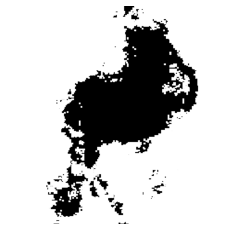

 25%|██▌       | 1/4 [00:00<00:02,  1.04it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


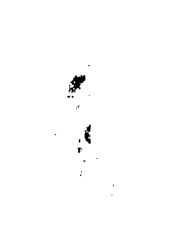

 50%|█████     | 2/4 [00:01<00:00,  2.01it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


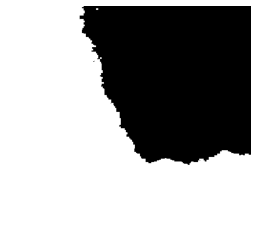

 75%|███████▌  | 3/4 [00:01<00:00,  2.92it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


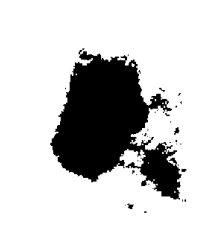

100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


In [10]:
from tqdm import tqdm
test_images =  glob("./test/*")

for path in tqdm(test_images,total=len(test_images)):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    original_image = x
    h, w, _ = x.shape
    x = cv2.resize(x, (256, 256))
    x = x/255.0
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=0)
    pred_mask = model.predict(x)[0]
    pred_mask = np.concatenate(
        [
            pred_mask,
            pred_mask,
            pred_mask
        ], axis=2)
    #print(pred_mask)
    pred_mask = (pred_mask > 0.5) * 255
    pred_mask = pred_mask.astype(np.float32)
    pred_mask = cv2.resize(pred_mask, (w, h))

    plt.imshow(pred_mask,vmin=0.0,vmax=1.0)
    plt.axis('off')
    plt.show()
    #original_image = original_image.astype(np.float32)
    #alpha = 0.6
    #cv2.addWeighted(pred_mask, alpha, original_image, 1-alpha, 0, original_image)
    name = path.split("\\")[-1]
    #print(f"./output/{name}")
    cv2.imwrite(f"output/{name}", pred_mask)